#### Scipy lectures:
# 3.4 sci-kit learn - Aprendizaje automático en Python
_Notebook basado en the Scientific Python Lectures:_

_https://lectures.scientific-python.org/packages/scikit-learn/index.html_

_Author: Emmanuelle Gouillart_. _Acknowledgements: This chapter is adapted from a tutorial given by Gaël Varoquaux, Jake Vanderplas, Olivier Grisel._

_Traducción (chatgpt, google translator, deepl) y adaptación a notebook: Pedro Segura_

### Ver también

> <span style="color:black; background-color:lightyellow; padding:2px;"> > Ciencia de datos en Python    
> - El capítulo de [Estadísticas en Python](https://lectures.scientific-python.org/packages/statistics/index.html#statistics) también puede ser de interés para los lectores que buscan aprender sobre aprendizaje automático.
> - La documentación de [scikit-learn](https://scikit-learn.org/) es muy completa y didáctica.
> </span>


### 3.4.1. Introducción: configuraciones de problemas

#### 3.4.1.1. ¿Qué es el aprendizaje automático?
> <span style="color:black; background-color:lightgreen; padding:2px;">
> El aprendizaje automático consiste en construir modelos computacionales con parámetros ajustables que se ajustan "automáticamente" para mejorar su comportamiento al adaptarse a datos previamente vistos.
> El aprendizaje automático puede considerarse un subcampo de la inteligencia artificial, ya que esos algoritmos pueden verse como bloques de construcción para hacer que las computadoras aprendan a comportarse de maneras similar a características de inteligencia humana, generalizando de alguna manera en lugar de simplemente almacenar y recuperar elementos de datos como lo haría un sistema de base de datos.
> </span>

Aquí veremos dos tareas muy simples de aprendizaje automático. La primera es una tarea de **clasificación**: la figura muestra una colección de datos bidimensionales, coloreados según dos etiquetas que denotan dos clases diferentes. Un algoritmo de clasificación puede usarse para trazar una frontera divisoria entre los dos grupos de puntos:

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_separator_001.png)

Un problema de clasificación. 

Al dibujar esta línea separadora, hemos introducido un modelo que puede **generalizar** a nuevos datos: si colocaras otro punto en el plano que no esté etiquetado, este algoritmo podría **predecir** ahora si es un punto azul o rojo.

La siguiente tarea simple que veremos es una tarea de **regresión**: una simple línea que mejor se ajusta a un conjunto de datos.

Nuevamente, este es un ejemplo de ajustar un modelo a los datos, pero nuestro enfoque aquí es que el modelo puede hacer generalizaciones sobre nuevos datos. El modelo ha **aprendido** a partir de los datos de entrenamiento y se puede usar para predecir el resultado de los datos de prueba: aquí, se nos podría dar un valor x, y el modelo nos permitiría predecir el valor y.

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_linear_regression_001.png)

Un problema de regresión.


### 3.4.1.2. Datos en scikit-learn

#### Arreglos de datos

Los algoritmos de aprendizaje automático implementados en `scikit-learn` esperan que los datos se almacenen en un **arreglo bidimensional o matriz**. Los arreglos pueden ser arreglos de `numpy`, o en algunos casos, matrices dispersas de scipy. Se espera que el tamaño del arreglo sea `[n_samples, n_features]`.

- **n_samples:** El número de muestras: cada muestra es un elemento a procesar (por ejemplo, clasificar). Una muestra puede ser un documento, una imagen, un sonido, un video, un objeto astronómico, una fila en una base de datos o archivo CSV, o cualquier cosa que puedas describir con un conjunto fijo de características cuantitativas.

- **n_features:** El número de características o rasgos distintos que se pueden usar para describir cada elemento de manera cuantitativa. Las características generalmente tienen valores reales, pero en algunos casos pueden ser booleanas o tener valores discretos.

### Un Ejemplo Simple: el Conjunto de _Datos Iris_

#### El problema de la aplicación

Como ejemplo de un conjunto de datos simple, veamos los _datos iris_ almacenados en scikit-learn. Supongamos que queremos reconocer especies de lirios. Los datos consisten en mediciones de tres especies diferentes de lirios:

![Setosa Iris](https://lectures.scientific-python.org/_images/iris_setosa.jpg)
Setosa Iris

![](https://lectures.scientific-python.org/_images/iris_versicolor.jpg) Versicolor Iris

![](https://lectures.scientific-python.org/_images/iris_virginica.jpg)Virginica Iris

> <span style="color:black; background-color:lightgrey; padding:2px;">
> **Pregunta Rápida:**
> 
> **Si queremos diseñar un algoritmo para reconocer especies de lirios, ¿qué datos se podrían usar?**
> 
> Recuerda: necesitamos un arreglo 2D de tamaño [n_samples x n_features].
> 
> - ¿A qué se referiría n_samples?
> - ¿A qué se referiría n_features?
> </span>


Recuerda que debe haber un número **fijo** de características para cada muestra, y la característica número i debe ser un tipo similar de cantidad para cada muestra.

### Cargando los _Datos Iris_ con Scikit-learn

Scikit-learn tiene un conjunto de datos muy sencillo sobre estas especies de lirios. Los datos consisten en lo siguiente:

**Características (_features_) en el conjunto de _datos Iris_:**

- longitud del sépalo (cm)
- ancho del sépalo (cm)
- longitud del pétalo (cm)
- ancho del pétalo (cm)

**Clases objetivo a predecir:**

- Setosa
- Versicolour
- Virginica

**scikit-learn** incluye una copia del archivo CSV de iris junto con una función para cargarlo en arreglos de NumPy:


In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

> <span style="color:black; background-color:lightgrey; padding:2px;">
> **Nota**
> 
> Importar sklearn. Ten en cuenta que scikit-learn se importa como sklearn.
> </span>

Las características de cada muestra de flor se almacenan en el atributo _data_ del conjunto de datos:


In [3]:
print(iris.data.shape)

(150, 4)


In [4]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)

150
4


In [5]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


La información sobre la clase de cada muestra se almacena en el atributo _target_ del conjunto de datos:


In [6]:
print(iris.target.shape)
print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Los nombres de las clases se almacenan en el último atributo, denominado _target_names_:

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Estos datos son de cuatro dimensiones, pero podemos visualizar dos de las dimensiones a la vez usando un gráfico de dispersión:

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_iris_scatter_001.png)

> <span style="color:black; background-color:lightgrey; padding:2px;"> 
> **Ejercicio:**
> 
> ¿Puedes elegir 2 características de dato para encontrar un gráfico donde sea más fácil separar las diferentes clases de lirios?
> 
> Pista: haz clic [aquí](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html) para ver el código que la genera y modifica este código.
> </span>


### 3.4.2. Principios básicos del aprendizaje automático con scikit-learn

#### 3.4.2.1. Introducción al objeto estimador de scikit-learn

Cada algoritmo se presenta en scikit-learn a través de un objeto "Estimator". Por ejemplo, una regresión lineal es: [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [8]:
from sklearn.linear_model import LinearRegression

**Parámetros del estimador:** Todos los parámetros de un estimador se pueden configurar cuando se instancia:


In [9]:
model = LinearRegression(n_jobs=1)
print(model)

LinearRegression(n_jobs=1)


### Ajuste en los datos

Vamos creando algunos datos simples con numpy:

In [12]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X = x[:, np.newaxis] # Los datos de entrada para sklearn son 2D: (muestras == 3 x características == 1)
X

array([[0],
       [1],
       [2]])

In [13]:
model.fit(X, y)

LinearRegression(n_jobs=1)

**Parámetros estimados:** Cuando los datos se ajustan con un estimador, los parámetros se estiman a partir de los datos disponibles. Todos los parámetros estimados son atributos del objeto estimador que terminan con un guion bajo:

In [14]:
model.coef_

array([1.])

### 3.4.2.2. Aprendizaje supervisado: Clasificación y regresión

En el **Aprendizaje Supervisado**, tenemos un conjunto de datos que consta tanto de características como de etiquetas. La tarea es construir un estimador que sea capaz de predecir la etiqueta de un objeto dado el conjunto de características. Un ejemplo relativamente simple es predecir la especie de un lirio dado un conjunto de mediciones de su flor. Esta es una tarea relativamente simple. Algunos ejemplos más complicados son:

- Dada una imagen multicolor de un objeto a través de un telescopio, determinar si ese objeto es una estrella, un cuásar o una galaxia.

- Dada una fotografía de una persona, identificar a la persona en la foto.

- Dada una lista de películas que una persona ha visto y su calificación personal de la película, recomendar una lista de películas que le puedan gustar (Sistemas de recomendación: un ejemplo famoso es el [Premio Netflix](https://en.wikipedia.org/wiki/Netflix_prize)).

> <span style="color:black; background-color:lightgreen; padding:2px;">
> Lo que tienen en común estas tareas es que hay una o más cantidades desconocidas asociadas con el objeto que necesitan ser determinadas a partir de otras cantidades observadas.
> </span>

El aprendizaje supervisado se divide en dos categorías, **clasificación** y **regresión**. En la clasificación, la etiqueta es discreta, mientras que en la regresión, la etiqueta es continua. Por ejemplo, en astronomía, la tarea de determinar si un objeto es una estrella, una galaxia o un cuásar es un problema de clasificación: la etiqueta proviene de tres categorías distintas. Por otro lado, podríamos desear estimar la edad de un objeto basándonos en tales observaciones: esto sería un problema de regresión, porque la etiqueta (edad) es una cantidad continua.

**Clasificación**: K vecinos más cercanos (kNN) es una de las estrategias de aprendizaje más simples: dada una nueva observación desconocida, busca en tu base de datos de referencia cuáles tienen las características más cercanas y asigna la clase predominante. Probémoslo en nuestro problema de clasificación de iris:


In [86]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
print('¿Qué tipo de lirio tiene un sépalo de 3cm x 5cm y un pétalo de 4cm x 2cm?')
print(f'R:{iris.target_names[knn.predict([[3, 5, 4, 2]])]}')

¿Qué tipo de lirio tiene un sépalo de 3cm x 5cm y un pétalo de 4cm x 2cm?
R:['virginica']


![](https://lectures.scientific-python.org/_images/sphx_glr_plot_iris_knn_001.png)

Un gráfico del espacio del sépalo y la predicción del KNN. REF:
https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_iris_knn.html

**Regresión:** El ajuste de regresión más simple posible es el de regresión lineal:


In [17]:
from sklearn.linear_model import LinearRegression

# x de 0 a 30
rng = np.random.default_rng()
x = 30 * rng.random((20, 1))

# y = a*x + b con ruido
y = 0.5 * x + 1.0 + rng.normal(size=x.shape)

# se define un modelo de regresión lineal
model = LinearRegression()
model.fit(x, y)

# prediciento y a partir de los datos
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])


![](https://lectures.scientific-python.org/_images/sphx_glr_plot_linear_regression_001.png)
Un gráfico de una regresión lineal simple. 

|||
|----------------------------|---------------|
| **En todos los estimadores:**          | - `model.fit()`: ajusta los datos de entrenamiento. Para aplicaciones de aprendizaje supervisado, esto acepta dos argumentos: los datos X y las etiquetas y (por ejemplo, `model.fit(X, y)`). Para aplicaciones de aprendizaje no supervisado, esto acepta solo un argumento, los datos X (por ejemplo, `model.fit(X)`).|
| **En estimadores supervisados:**   | - `model.predict()`: dado un modelo entrenado, predice la etiqueta de un nuevo conjunto de datos. Este método acepta un argumento, los nuevos datos X_new (por ejemplo, `model.predict(X_new)`), y devuelve la etiqueta aprendida para cada objeto en el arreglo. |
|   | - `model.predict_proba()`: Para problemas de clasificación, algunos estimadores también proporcionan este método, que devuelve la probabilidad de que una nueva observación tenga cada etiqueta categórica. En este caso, la etiqueta con la mayor probabilidad es devuelta por `model.predict()`. |
|   | - `model.score()`: para problemas de clasificación o regresión, la mayoría (¿todos?) los estimadores implementan un método de puntuación. Las puntuaciones están entre 0 y 1, con una puntuación mayor indicando un mejor ajuste.  |
| **En estimadores no supervisados:** | - `model.transform()`: dado un modelo no supervisado, transforma nuevos datos en la nueva base. Esto también acepta un argumento X_new, y devuelve la nueva representación de los datos basada en el modelo no supervisado. |
|   | - `model.fit_transform()`: algunos estimadores implementan este método, que realiza de manera más eficiente un ajuste y una transformación en los mismos datos de entrada. |


### 3.4.2.4. Regularización: qué es y por qué es necesaria

#### Prefiriendo modelos más simples

**Errores de entrenamiento** Supongamos que estás utilizando un estimador de 1-vecino más cercano. ¿Cuántos errores esperas tener en tu conjunto de entrenamiento?

- El error del conjunto de entrenamiento no es una buena medida del rendimiento de la predicción. Necesitas apartar ciertos datos en un conjunto de prueba.

- En general, deberíamos aceptar cierto error en evaluaciones en el conjunto de entrenamiento.

**Ejemplo de regularización** La idea central detrás de la regularización es que vamos a preferir modelos que sean más simples, para una cierta definición de "simple", incluso si conducen a más errores en el conjunto de entrenamiento.

Como [ejemplo](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_polynomial_regression.html), generemos un conjunto de datos con un polinomio de 9º orden, con ruido:

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_polynomial_regression_001.png)

Y ahora, ajustemos un polinomio de 4º orden y un polinomio de 9º orden a los datos.

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_polynomial_regression_002.png)

A simple vista, ¿qué modelo prefieres, el de 4º orden o el de 9º orden?

Veamos la verdad fundamental:

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_polynomial_regression_003.png)


> <span style="color:black; background-color:lightgreen; padding:2px;">
> La regularización es omnipresente en el aprendizaje automático. La mayoría de los estimadores de scikit-learn tienen un parámetro para ajustar la cantidad de regularización. Por ejemplo, con k-NN, es 'k', el número de vecinos más cercanos utilizados para tomar la decisión. k=1 equivale a no regularización: 0 error en el conjunto de entrenamiento, mientras que un k grande tenderá a crear fronteras de decisión más suaves en el espacio de características.
> </span>


### Modelos simples versus complejos para clasificación

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_svm_non_linear_001.png)Una separación lineal

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_svm_non_linear_002.png)Una separación no lineal

REF:https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_svm_non_linear.html

> <span style="color:black; background-color:lightgreen; padding:2px;">
> Para los modelos de clasificación, la frontera de decisión, que separa las clases, expresa la complejidad del modelo. Por ejemplo, un modelo lineal, que toma decisiones basadas en una combinación lineal de características, es menos complejo que uno no lineal.
> </span>

### 3.4.3. Aprendizaje Supervisado: Clasificación de Dígitos Manuscritos

#### 3.4.3.1. La naturaleza de los datos

En esta sección aplicaremos scikit-learn a la clasificación de dígitos manuscritos. Esto irá un poco más allá de la clasificación de iris que vimos antes: discutiremos algunas de las métricas que se pueden utilizar para evaluar la efectividad de un modelo de clasificación.

> <span style="color:black; background-color:lightyellow; padding:2px;">> **Código y notebook**
> El código en Python y el Jupyter notebook para esta sección se encuentran [aquí](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html#sphx-glr-packages-scikit-learn-auto-examples-plot-digits-simple-classif-py).
> </span>


In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_digits_simple_classif_001.png)

Visualicemos los datos y recordemos lo que estamos observando (haz clic [aquí](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html#sphx-glr-packages-scikit-learn-auto-examples-plot-digits-simple-classif-py) para ver el código completo):


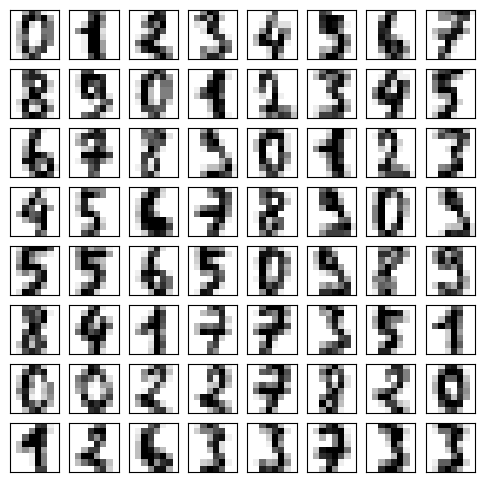

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches

# Grafica los dígitos: cada imagen es de 8x8 píxeles
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

### 3.4.3.2. Visualización de los Datos en sus Componentes Principales

Un buen primer paso para muchos problemas es visualizar los datos utilizando una técnica de Reducción de Dimensionalidad. Comenzaremos con la más sencilla, el [Análisis de Componentes Principales (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).

PCA busca combinaciones lineales ortogonales de las características que muestran la mayor varianza y, como tal, puede ayudarte a obtener una buena idea de la estructura del conjunto de datos.


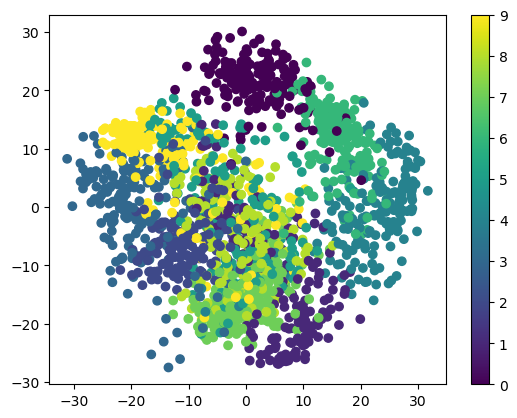

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

> <span style="color:black; background-color:lightgrey; padding:2px;">
> **Pregunta**
>
> Con estas proyecciones de los datos, ¿cuáles números crees que un clasificador podría presentar problemas para distinguir características?
> </span>

### 3.4.3.3. Clasificación Gaussiana Naive (ingenua) Bayes

Para la mayoría de los problemas de clasificación, es útil tener un método simple y rápido que proporcione una clasificación inicial rápida. Si el método simple y rápido es suficiente, entonces no tenemos que gastar ciclos de CPU en modelos más complejos. Si no, podemos usar los resultados del método simple para obtener pistas sobre nuestros datos.

Un buen método a tener en cuenta es Gaussian Naive Bayes ([sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)).

> <span style="color:black; background-color:lightgreen; padding:2px;">
> Gaussian Naive Bayes ajusta una distribución gaussiana a cada etiqueta de entrenamiento de manera independiente en cada característica, y usa esto para dar rápidamente una clasificación aproximada. Generalmente no es lo suficientemente preciso para datos del mundo real, pero puede funcionar sorprendentemente bien, por ejemplo, con datos de texto.
> </span>


In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
   digits.data, digits.target, random_state=42)

# entrenar el modelo
clf = GaussianNB()
clf.fit(X_train, y_train)

# usar el modelo para predecir las etiquetas de los datos de prueba
predicted = clf.predict(X_test)
expected = y_test
print(predicted)

[6 9 3 7 2 2 5 8 5 2 1 1 7 0 4 8 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 2 5 6 0 9 0 0 1 7 4 5 2 4 5 7 0 7 5 9 9 5 7
 7 0 4 5 5 5 9 0 2 3 8 0 6 4 4 9 1 2 1 3 5 2 9 0 4 7 4 3 5 3 1 8 5 7 4 2 7
 7 7 6 1 9 8 7 8 7 2 6 9 4 5 7 8 7 5 8 5 5 7 7 0 6 6 4 2 8 0 9 4 6 8 9 6 9
 0 5 5 6 6 0 6 4 2 3 3 7 7 2 9 0 4 5 8 6 5 7 9 8 4 8 1 3 7 7 2 8 3 9 8 0 3
 8 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 8 8 6 0 4 5 8 7
 4 6 4 5 6 0 3 2 3 6 7 9 5 1 4 7 6 8 1 5 5 1 4 1 8 8 7 5 7 6 2 2 2 3 4 8 7
 8 6 0 8 7 7 0 1 0 4 5 8 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 7 5 3 3 1 0 5
 8 3 4 0 2 7 6 4 3 7 5 0 5 2 1 3 1 4 8 1 7 0 1 7 8 1 8 8 7 0 6 7 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 6 0 7 9 8 9 5 2 7 7 9 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 6 5 7 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 8 1 8 5 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 8 7 0 5 9 7 5 9 7 4 8 2 9 0 7 5 8 3 6 3 6 6 9 5 0 1 5 5 8
 3 9 6 2 6 5]


In [25]:
print(expected)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]


Como se mencionó anteriormente, graficamos los dígitos con las etiquetas predichas para hacernos una idea de qué tan bien está funcionando la clasificación.

### 3.4.3.4. Medición Cuantitativa del Rendimiento

Nos gustaría medir el rendimiento de nuestro estimador sin tener que recurrir a graficar ejemplos. Un método simple podría ser simplemente comparar el número de coincidencias:


In [28]:
matches = (predicted == expected)
print(matches.sum())

385


In [29]:
print(len(matches))

450


In [30]:
matches.sum() / float(len(matches))

0.8555555555555555

Vemos que más del 80% de las 450 predicciones coinciden con las entradas. Pero hay otras métricas más sofisticadas que se pueden usar para juzgar el rendimiento de un clasificador: varias están disponibles en el submódulo [sklearn.metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics).

Una de las métricas más útiles es el `classification_report`, que combina varias medidas e imprime una tabla con los resultados:


In [31]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.85      0.78      0.82        37
           2       0.85      0.61      0.71        38
           3       0.97      0.83      0.89        46
           4       0.98      0.84      0.90        55
           5       0.90      0.95      0.93        59
           6       0.90      0.96      0.92        45
           7       0.71      0.98      0.82        41
           8       0.60      0.89      0.72        38
           9       0.90      0.73      0.80        48

    accuracy                           0.86       450
   macro avg       0.87      0.85      0.85       450
weighted avg       0.88      0.86      0.86       450



Otra métrica esclarecedora para este tipo de clasificación multietiqueta es una matriz de confusión: nos ayuda a visualizar qué etiquetas se están intercambiando en los errores de clasificación:


In [33]:
print(metrics.confusion_matrix(expected, predicted))

[[41  0  0  0  0  1  0  1  0  0]
 [ 0 29  2  0  0  0  0  0  4  2]
 [ 0  2 23  0  0  0  1  0 12  0]
 [ 0  0  1 38  0  1  0  0  5  1]
 [ 0  0  0  0 46  0  2  7  0  0]
 [ 0  0  0  0  0 56  1  1  0  1]
 [ 0  0  0  0  1  1 43  0  0  0]
 [ 0  0  0  0  0  1  0 40  0  0]
 [ 0  2  0  0  0  0  0  2 34  0]
 [ 0  1  1  1  0  2  1  5  2 35]]


Vemos aquí que, en particular, los números 1, 2, 3 y 9 a menudo se etiquetan como 8.

### 3.4.4. Aprendizaje Supervisado: Regresión de Datos de Viviendas

Aquí haremos un breve ejemplo de un problema de regresión: aprender un valor continuo a partir de un conjunto de características.

#### 3.4.4.1. Un vistazo rápido a los datos

Usaremos el conjunto de precios de viviendas en California, disponible en scikit-learn. Este conjunto registra mediciones de 8 atributos de los mercados de viviendas en California, así como el precio mediano. La pregunta es: ¿puedes predecir el precio de un nuevo mercado dados sus atributos?

> <span style="color:black; background-color:lightyellow; padding:2px;">**Código y notebook**: El código en Python y el Jupyter notebook para esta sección se encuentran [aquí](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_california_prediction.html#sphx-glr-packages-scikit-learn-auto-examples-plot-california-prediction-py).
> </span>


In [34]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
print(data.data.shape)
print(data.target.shape)

(20640, 8)
(20640,)


Podemos ver que hay un poco más de 20,000 puntos de datos.

La variable `DESCR` tiene una descripción larga del conjunto de datos:


In [35]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

A menudo es útil visualizar rápidamente partes de los datos usando histogramas, diagramas de dispersión u otros tipos de gráficos. Con matplotlib, mostremos un histograma de los valores objetivo: el precio mediano en cada vecindario:


(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

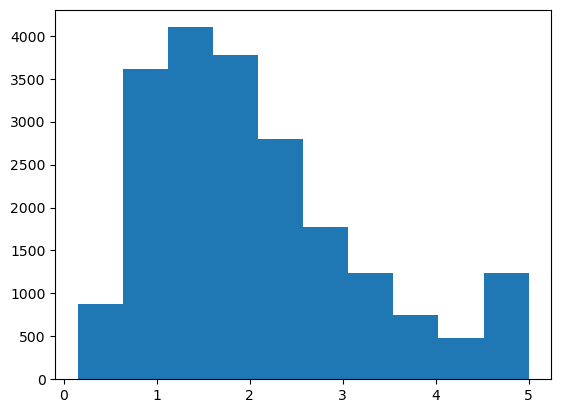

In [36]:
plt.hist(data.target)

Echemos un vistazo rápido para ver si algunas características son más relevantes que otras para nuestro problema:

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


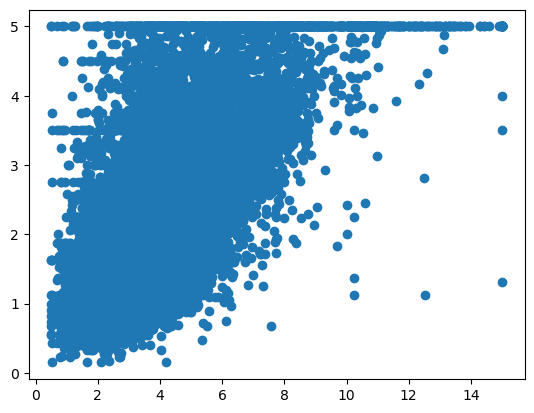

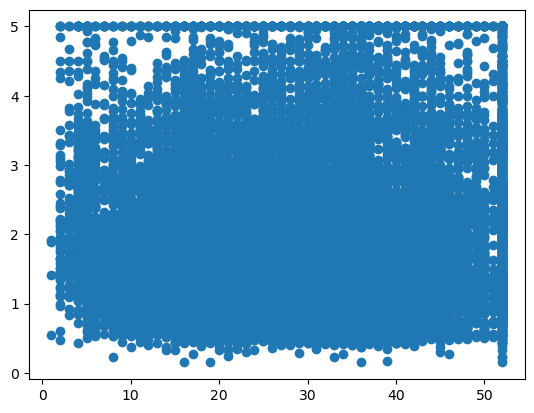

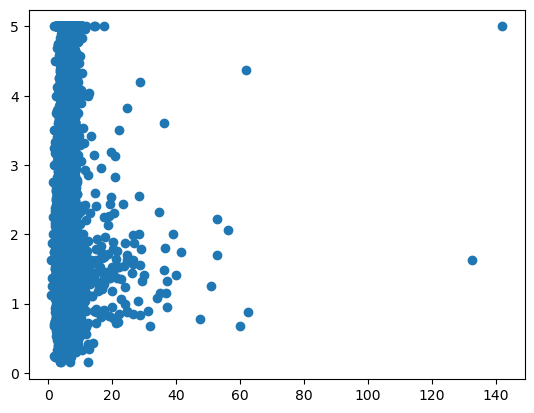

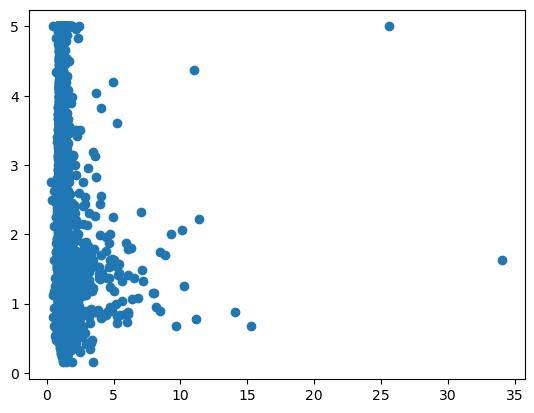

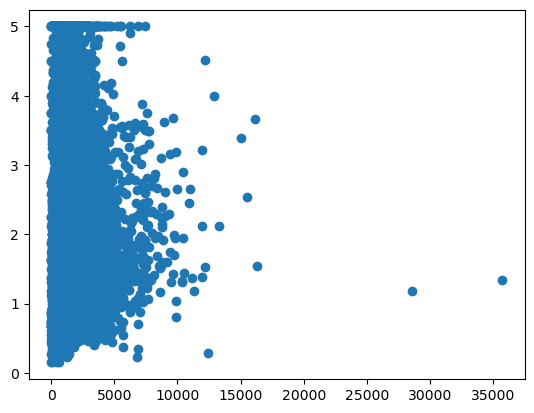

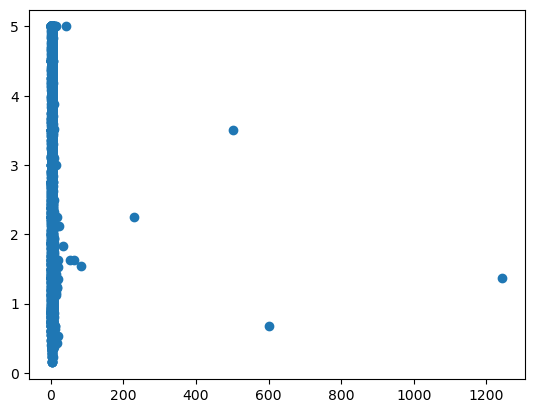

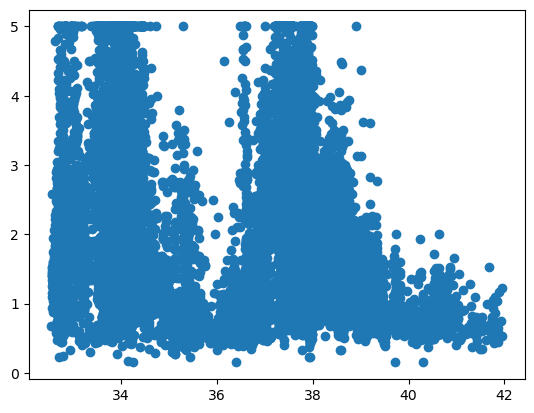

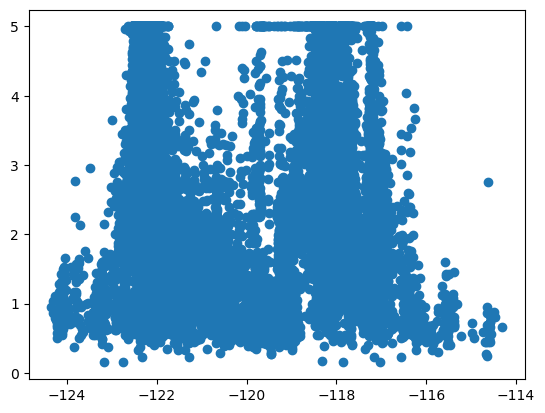

In [38]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure()
    print(feature_name)
    plt.scatter(data.data[feature_name], data.target)

Esta es una versión manual de una técnica llamada **selección de características**.

> <span style="color:black; background-color:lightgreen; padding:2px;">
> A veces, en aprendizaje automático, es útil utilizar la selección de características para decidir cuáles son las más útiles para un problema en particular. Existen métodos automatizados que cuantifican este tipo de ejercicio para elegir las características más informativas.
> </span>

### 3.4.4.2. Prediciendo Precios de Viviendas: una Regresión Lineal Simple

Ahora usaremos `scikit-learn` para realizar una regresión lineal simple en los datos de viviendas. Hay muchas posibilidades de regresores a utilizar. Uno particularmente simple es `LinearRegression`: básicamente es un contenedor alrededor de un cálculo de mínimos cuadrados ordinarios.


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
print("RMS: %s" % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 0.7260785811503062


Podemos graficar el error: esperado como una función de lo predicho:
![](https://lectures.scientific-python.org/_images/sphx_glr_plot_california_prediction_010.png)


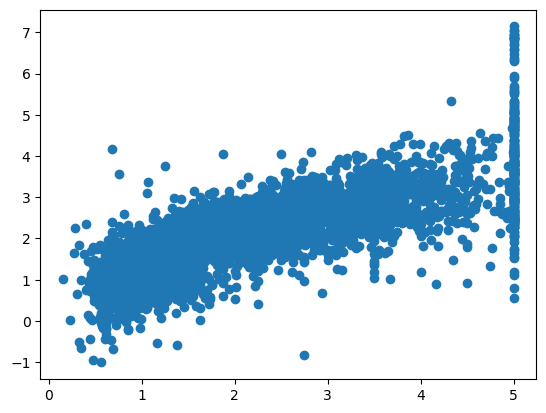

In [40]:
plt.scatter(expected, predicted)


> <span style="color:black; background-color:lightgrey; padding:2px;">**Ejercicio: Regresión con Árbol de Potenciación de Gradiente**:
> 
> Hay muchos otros tipos de regresores disponibles en scikit-learn: aquí probaremos uno más potente.
>
> Usa la clase GradientBoostingRegressor para ajustar los datos de viviendas.
>
> **Pista:** Puedes copiar y pegar parte del código anterior, reemplazando [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) con [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor):

    from sklearn.ensemble import GradientBoostingRegressor
    # instancia el modelo, ajustalo, y grafica dispersión in vs out

> **Solución:** La solución se encuentra [aquí](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_california_prediction.html#sphx-glr-packages-scikit-learn-auto-examples-plot-california-prediction-py).
> </span>



### 3.4.5. Medición del rendimiento de la predicción

#### 3.4.5.1. Una prueba rápida en el clasificador de K-vecinos

Aquí continuaremos examinando los datos de los dígitos, pero cambiaremos al clasificador de K-vecinos. El clasificador de K-vecinos es un clasificador basado en instancias. El clasificador de K-vecinos predice la etiqueta de un punto desconocido basándose en las etiquetas de los K puntos más cercanos en el espacio de parámetros.




In [41]:
# Carga de datos
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
# Instaciado y entrenamiento del clasificador
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
# Chequeo de resultado usando métricas
from sklearn import metrics
y_pred = clf.predict(X)
print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


Aparentemente hemos encontrado un clasificador perfecto! Pero, es engañoso por las razones que vimos antes: el clasificador esencialmente "memoriza" todas las muestras que ya ha visto. Para probar realmente qué tan bien funciona este algoritmo, necesitamos probar algunas muestras que aún no ha visto.

Este problema también ocurre con los modelos de regresión. A continuación, ajustamos otro modelo basado en instancias llamado "árbol de decisión" al conjunto de datos de precios de viviendas en California que presentamos anteriormente:

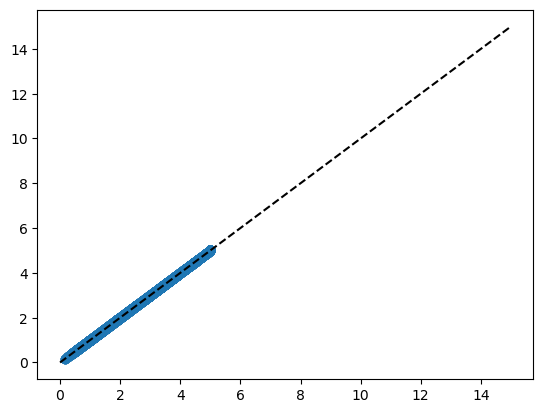

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
data = fetch_california_housing(as_frame=True)
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)
expected = data.target
plt.scatter(expected, predicted)
plt.plot([0, 15], [0, 15], '--k')

Aquí nuevamente, las predicciones parecen perfectas ya que el modelo pudo memorizar perfectamente el conjunto de entrenamiento.

> <span style="color:black; background-color:red; padding:2px;"> *Advertencia*: **Rendimiento en el conjunto de prueba** El rendimiento en el conjunto de prueba no mide el sobreajuste (como se describe arriba).
> </span>

#### 3.4.5.2. Un enfoque correcto: Uso de un conjunto de validación

Aprender los parámetros de una función de predicción y probarla en los mismos datos es un error metodológico: un modelo que solo repitiera las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil en datos aún no vistos.

Para evitar el sobreajuste, debemos definir dos conjuntos diferentes:

- un conjunto de entrenamiento `X_train`, `y_train` que se usa para aprender los parámetros de un modelo predictivo

- un conjunto de prueba `X_test`, `y_test` que se usa para evaluar el modelo predictivo ajustado

En scikit-learn, una división aleatoria de este tipo se puede calcular rápidamente con la función [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split):


In [44]:
from sklearn import model_selection
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)
print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


Ahora entrenamos con los datos de entrenamiento y probamos con los datos de prueba:

In [45]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

    accuracy                           0.99       450
   macro avg       

El promedio del f1-score se usa a menudo como una medida conveniente del rendimiento general de un algoritmo. Aparece en la última fila del informe de clasificación; también se puede acceder directamente:


In [46]:
metrics.f1_score(y_test, y_pred, average="macro")

0.9913675218842191

El sobreajuste que vimos anteriormente se puede cuantificar calculando el f1-score en los propios datos de entrenamiento:


In [47]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0

> <span style="color:black; background-color:lightgrey; padding:2px;">**Nota: Métricas de regresión** En el caso de los modelos de regresión, necesitamos usar diferentes métricas, como la varianza explicada.
> </span>


#### 3.4.5.3. Selección de Modelos mediante Validación
> <span style="color:black; background-color:lightgreen; padding:2px;">
> Hemos aplicado clasificadores Gaussian Naive Bayes, máquinas de vectores de soporte y K-vecinos más cercanos al conjunto de datos de dígitos. Ahora que tenemos estas herramientas de validación, podemos preguntar cuantitativamente cuál de los tres estimadores funciona mejor para este conjunto de datos.
> </span>

- Con los hiperparámetros predeterminados para cada estimador, ¿cuál da el mejor f1-score en el **conjunto de validación**? Recuerda que los hiperparámetros son los parámetros establecidos cuando se instancia el clasificador: por ejemplo, `n_neighbors` en `clf = KNeighborsClassifier(n_neighbors=1)`.


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)
for Model in [GaussianNB(), KNeighborsClassifier(), LinearSVC(dual=False)]:
    clf = Model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__class__.__name__, metrics.f1_score(y_test, y_pred, average="macro")))

GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
LinearSVC: 0.9344942114287971


- Para cada clasificador, ¿qué valor de los hiperparámetros da los mejores resultados para los datos de dígitos? Para [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), usa `loss='l2'` y `loss='l1'`. Para [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) usamos `n_neighbors` entre 1 y 10. Ten en cuenta que [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) no tiene hiperparámetros ajustables.

- Solución: [código fuente](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_compare_classifiers.html#sphx-glr-packages-scikit-learn-auto-examples-plot-compare-classifiers-py)


In [ ]:
LinearSVC(loss='l1'): 0.930570687535
LinearSVC(loss='l2'): 0.933068826918
-------------------
KNeighbors(n_neighbors=1): 0.991367521884
KNeighbors(n_neighbors=2): 0.984844206884
KNeighbors(n_neighbors=3): 0.986775344954
KNeighbors(n_neighbors=4): 0.980371905382
KNeighbors(n_neighbors=5): 0.980456280495
KNeighbors(n_neighbors=6): 0.975792419414
KNeighbors(n_neighbors=7): 0.978064579214
KNeighbors(n_neighbors=8): 0.978064579214
KNeighbors(n_neighbors=9): 0.978064579214
KNeighbors(n_neighbors=10): 0.975555089773

#### 3.4.5.4. Validación Cruzada

La validación cruzada consiste en dividir repetidamente los datos en pares de conjuntos de entrenamiento y prueba, llamados 'folds'. Scikit-learn incluye una función para calcular automáticamente la puntuación en todos estos folds. Aquí usamos [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) con k=5.


In [50]:
clf = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5) 

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

Podemos usar diferentes estrategias de partición, como la partición aleatoria:

In [51]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5)
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 1.        , 0.97777778, 0.99444444, 0.98333333])

> <span style="color:black; background-color:lightgreen; padding:2px;">Existen muchas [estrategias de validación cruzada](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators) en scikit-learn. A menudo son útiles para tener en cuenta conjuntos de datos que no son iid (independientes e idénticamente distribuidos).
> </span>

#### 3.4.5.5. Optimización de Hiperparámetros con Validación Cruzada

Consideremos modelos lineales regularizados, como la regresión Ridge, que utiliza regularización l2, y la regresión Lasso, que utiliza regularización l1. Elegir su parámetro de regularización es importante.

Establezcamos estos parámetros en el conjunto de datos de Diabetes, un problema de regresión simple. Los datos de diabetes consisten en 10 variables fisiológicas (edad, sexo, peso, presión arterial) medidas en 442 pacientes, y una indicación de la progresión de la enfermedad después de un año:



In [52]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


Con los hiperparámetros predeterminados: calculamos la puntuación de validación cruzada:

In [53]:
from sklearn.linear_model import Ridge, Lasso
for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

Ridge: 0.410174971340889
Lasso: 0.3375593674654274


### Optimización Básica de Hiperparámetros

Calculamos la puntuación de validación cruzada como una función de alpha, la fuerza de la regularización para [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) y [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). Elegimos 20 valores de alpha entre 0.0001 y 1:


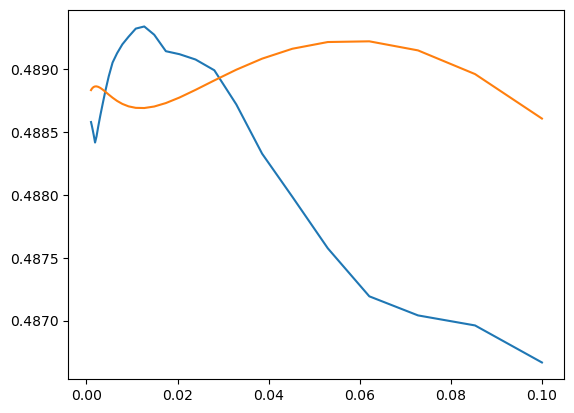

In [54]:
alphas = np.logspace(-3, -1, 30)
for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

> <span style="color:black; background-color:lightgrey; padding:2px;">**Pregunta:** ¿Podemos confiar en que nuestros resultados sean realmente útiles?
> </span>

### Realización Automática con Grid Search

**sklearn.grid_search.GridSearchCV**  construye con un estimador, así como con un diccionario de valores de parámetros a buscar. Podemos encontrar los parámetros óptimos de esta manera:


In [55]:
from sklearn.model_selection import GridSearchCV
for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

Ridge: {'alpha': 0.06210169418915616}
Lasso: {'alpha': 0.01268961003167922}


### Búsqueda de Hiperparámetros Incorporada

Para algunos modelos dentro de scikit-learn, la validación cruzada se puede realizar de manera más eficiente en grandes conjuntos de datos. En este caso, se incluye una versión con validación cruzada del modelo en particular. Las versiones con validación cruzada de [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) y [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) son [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) y [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV), respectivamente. La búsqueda de parámetros en estos estimadores se puede realizar de la siguiente manera:


In [56]:
from sklearn.linear_model import RidgeCV, LassoCV
for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, model.alpha_))

RidgeCV: 0.06210169418915616
LassoCV: 0.01268961003167922


Vemos que los resultados coinciden con los devueltos por GridSearchCV.

### Validación cruzada anidada

¿Cómo medimos el rendimiento de estos estimadores? Hemos utilizado datos para establecer los hiperparámetros, por lo que necesitamos probar con datos realmente nuevos. Podemos hacer esto ejecutando [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) en nuestros objetos CV. Aquí hay 2 bucles de validación cruzada en funcionamiento, esto se llama _‘validación cruzada anidada’_:

> <span style="color:black; background-color:lightgrey; padding:2px;"> **Nota:** Ten en cuenta que estos resultados no coinciden con los mejores resultados de nuestras curvas anteriores, y LassoCV parece tener un rendimiento inferior al de RidgeCV. La razón es que establecer el hiperparámetro es más difícil para Lasso, por lo tanto, el error de estimación en este hiperparámetro es mayor.
> </span>

### 3.4.6. Aprendizaje no Supervisado: Reducción de Dimensionalidad y Visualización

El aprendizaje no supervisado se aplica en X sin y: datos sin etiquetas. Un caso de uso típico es encontrar estructuras ocultas en los datos.

#### 3.4.6.1. Reducción de Dimensionalidad: PCA

La reducción de dimensionalidad deriva un conjunto de nuevas características artificiales más pequeñas que el conjunto de características original. Aquí usaremos [Análisis de Componentes Principales (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), una técnica de reducción de dimensionalidad que se esfuerza por retener la mayor parte de la varianza de los datos originales. Usaremos [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) en el conjunto de datos de iris:



In [57]:
X = iris.data
y = iris.target

> <span style="color:black; background-color:lightgreen; padding:2px;">**PCA** calcula combinaciones lineales de las características originales usando una Descomposición en Valores Singulares truncada de la matriz X, para proyectar los datos en una base de los vectores singulares principales.
> </span>


In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(n_components=2, whiten=True)

Una vez ajustado, PCA expone los vectores singulares en el atributo `components_`:


In [59]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Otros atributos también están disponibles:


In [60]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Proyectemos el conjunto de datos de iris a lo largo de esas dos primeras dimensiones:

In [61]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

PCA `normaliza` y `blanquea` los datos, lo que significa que ahora los datos están centrados en ambos componentes con varianza unitaria:

In [63]:
X_pca.mean(axis=0)

array([-1.37371596e-15, -1.84815126e-15])

In [64]:
X_pca.std(axis=0, ddof=1)

array([1., 1.])

Además, los componentes de las muestras ya no llevan ninguna correlación lineal:

In [65]:
np.corrcoef(X_pca.T)  

array([[1.00000000e+00, 9.57455404e-16],
       [9.57455404e-16, 1.00000000e+00]])

Con un número de componentes retenidos de 2 o 3, PCA es útil para visualizar el conjunto de datos:

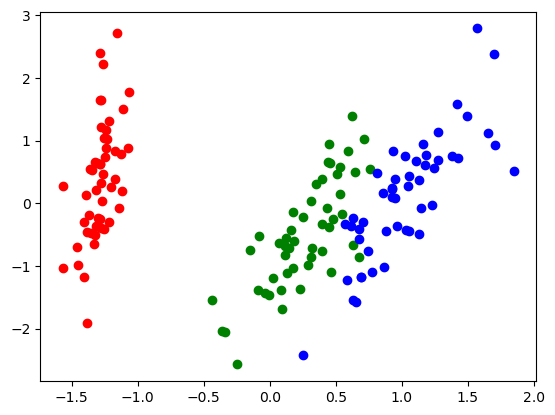

In [66]:
target_ids = range(len(iris.target_names))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=c, label=label)

> <span style="color:black; background-color:lightgreen; padding:2px;">
> Nota que esta proyección se determinó sin ninguna información sobre las etiquetas (representadas por los colores): este es el sentido en el que el aprendizaje es no supervisado. Sin embargo, vemos que la proyección nos da una idea de la distribución de las diferentes flores en el espacio de parámetros: notablemente, iris setosa es mucho más distinta que las otras dos especies.
> </span>

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_pca_001.png)

#### 3.4.6.2. Visualización con una incrustación no lineal: tSNE

Para la visualización, las incrustaciones más complejas pueden ser útiles (para el análisis estadístico, son más difíciles de controlar). [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) es un método de aprendizaje de variedades tan poderoso. Lo aplicamos al conjunto de datos de dígitos, ya que los dígitos son vectores de dimensión 8*8 = 64. Incrustarlos en 2D permite la visualización:


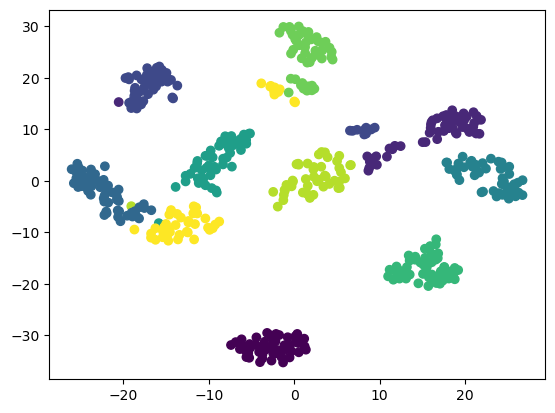

In [69]:
# Tomar los primeros 500 puntos de datos: es difícil ver 1500 puntos
X = digits.data[:500]
y = digits.target[:500]

# Ajustar y transformar con TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0)
X_2d = tsne.fit_transform(X)

# Visualizar los datos
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)


> <span style="color:black; background-color:lightgrey; padding:2px;">**fit_transform**
> Como TSNE no se puede aplicar a nuevos datos, necesitamos usar su método fit_transform.
> </span>

REF: https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_tsne.html

`sklearn.manifold.TSNE` separa bastante bien las diferentes clases de dígitos a pesar de no haber tenido acceso a la información de las clases.

> <span style="color:black; background-color:lightgrey; padding:2px;">**Ejercicio: Otras reducciones de dimensión de dígitos** sklearn.manifold tiene muchas otras incrustaciones no lineales. Pruébalas en el conjunto de datos de dígitos. ¿Podrías juzgar su calidad sin conocer las etiquetas `y`?
> 
>     from sklearn.datasets import load_digits
>     digits = load_digits()
>     # ...
> 
> </span>

### 3.4.7. Selección de Parámetros, Validación y Pruebas

#### 3.4.7.1. Hiperparámetros, Sobreajuste y Subajuste

> <span style="color:black; background-color:lightyellow; padding:2px;">**Ver también:** Esta sección está adaptada del excelente curso de Coursera de [Andrew Ng](https://www.coursera.org/course/ml).
> </span>


Los problemas asociados con la validación y la validación cruzada son algunos de los aspectos más importantes de la práctica del aprendizaje automático. Seleccionar el modelo óptimo para tus datos es vital, y es una parte del problema que a menudo no es apreciada por los practicantes de aprendizaje automático.

La pregunta central es: **Si nuestro estimador está teniendo un rendimiento insuficiente, ¿cómo debemos proceder?**

- ¿Usar un modelo más simple o más complicado?
- ¿Agregar más características a cada punto de datos observado?
- ¿Agregar más muestras de entrenamiento?

La respuesta a menudo es contraintuitiva. En particular, **A veces usar un modelo más complicado dará peores resultados**. También, **A veces agregar datos de entrenamiento no mejorará tus resultados**. La capacidad de determinar qué pasos mejorarán tu modelo es lo que separa a los practicantes exitosos de aprendizaje automático de los que no lo son.

### Compensación entre sesgo y varianza: ilustración en un problema de regresión simple

Comencemos con un problema de regresión 1D simple. Esto nos ayudará a visualizar fácilmente los datos y el modelo, y los resultados se generalizan fácilmente a conjuntos de datos de mayor dimensión. Exploraremos un problema de **regresión lineal** simple, con [sklearn.linear_model](https://scikit-learn.org/stable/api/sklearn.linear_model.html#module-sklearn.linear_model).

> <span style="color:black; background-color:lightyellow; padding:2px;">**Código y notebook:** El código en Python y el Jupyter notebook para esta sección se encuentran [aquí](https://lectures.scientific-python.org/packages/scikit-learn/auto_examples/plot_variance_linear_regr.html#sphx-glr-packages-scikit-learn-auto-examples-plot-variance-linear-regr-py).
> </span>



In [70]:
X = np.c_[0.5, 1].T
y = [0.5, 1]
X_test = np.c_[0, 2].T

Sin ruido, ya que la regresión lineal ajusta los datos perfectamente

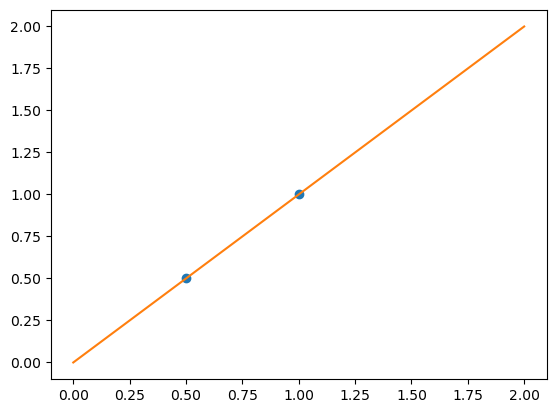

In [71]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(X, y, "o")
plt.plot(X_test, regr.predict(X_test))

En situaciones de la vida real, tenemos ruido (por ejemplo, ruido de medición) en nuestros datos:


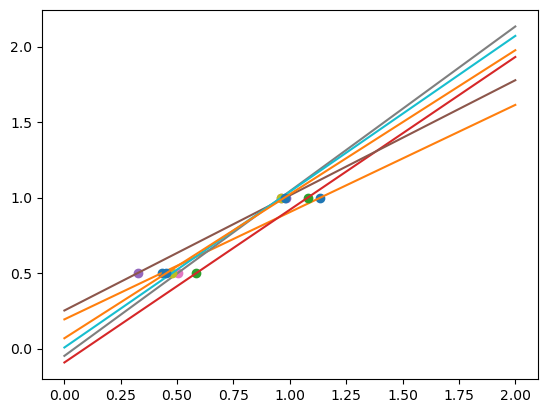

In [73]:
rng = np.random.default_rng(27446968)
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=0.1, size=X.shape)
    plt.plot(noisy_X, y, "o")
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

Como podemos ver, nuestro modelo lineal captura y amplifica el ruido en los datos. Muestra mucha varianza.

Podemos usar otro estimador lineal que usa regularización, el estimador Ridge. Este estimador regulariza los coeficientes reduciéndolos a cero, bajo el supuesto de que las correlaciones muy altas a menudo son espurias. El parámetro alpha controla la cantidad de reducción utilizada.


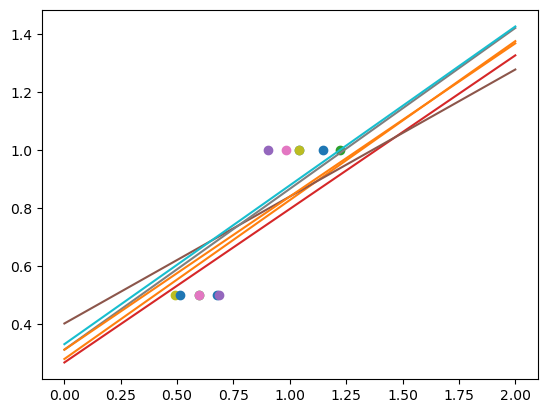

In [74]:
regr = linear_model.Ridge(alpha=0.1)
np.random.seed(0)
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=0.1, size=X.shape)
    plt.plot(noisy_X, y, "o")
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

plt.show()

Como podemos ver, el estimador muestra mucha menos varianza. Sin embargo, sistemáticamente subestima los coeficientes. Muestra un comportamiento sesgado.

Este es un ejemplo típico de la **compensación entre sesgo y varianza**: los estimadores no regularizados no están sesgados, pero pueden mostrar mucha varianza. Los modelos altamente regularizados tienen poca varianza, pero mucho sesgo. Este sesgo no es necesariamente algo malo: lo que importa es elegir la compensación entre sesgo y varianza que conduzca al mejor rendimiento de predicción. Para un conjunto de datos específico, hay un punto óptimo que corresponde a la mayor complejidad que los datos pueden soportar, dependiendo de la cantidad de ruido y de las observaciones disponibles.



#### 3.4.7.2. Visualización de la Compensación entre Sesgo y Varianza

> <span style="color:black; background-color:lightgreen; padding:2px;"> Dado un conjunto de datos particular y un modelo (por ejemplo, un polinomio), nos gustaría entender si el sesgo (subajuste) o la varianza limitan la predicción, y cómo ajustar el hiperparámetro (aquí d, el grado del polinomio) para obtener el mejor ajuste.
> </span>

En un conjunto de datos dado, ajustemos un modelo de regresión polinómica simple con grados variables:


![](https://lectures.scientific-python.org/_images/sphx_glr_plot_bias_variance_001.png)

> <span style="color:black; background-color:lightgreen; padding:2px;"> En la figura anterior, vemos ajustes para tres valores diferentes de d. Para `d = 1`, los datos están subajustados. Esto significa que el modelo es demasiado simplista: ninguna línea recta será un buen ajuste para estos datos. En este caso, decimos que el modelo sufre de alto sesgo. El modelo en sí está sesgado, y esto se reflejará en el hecho de que los datos están mal ajustados. En el otro extremo, para `d = 6`, los datos están sobreajustados. Esto significa que el modelo tiene demasiados parámetros libres (6 en este caso) que se pueden ajustar para encajar perfectamente en los datos de entrenamiento. Sin embargo, si añadimos un nuevo punto a este gráfico, es probable que esté muy lejos de la curva que representa el ajuste de grado 6. En este caso, decimos que el modelo sufre de alta varianza. La razón del término "alta varianza" es que si alguno de los puntos de entrada varía ligeramente, podría resultar en un modelo muy diferente.
> En el medio, para `d = 2`, hemos encontrado un buen punto medio. Se ajusta bastante bien a los datos y no sufre de los problemas de sesgo y varianza vistos en las figuras a ambos lados. Lo que nos gustaría es una forma de identificar cuantitativamente el sesgo y la varianza, y optimizar los metaparámetros (en este caso, el grado del polinomio d) para determinar el mejor algoritmo.
> </span>


> <span style="color:black; background-color:lightgrey; padding:2px;">**Regresión polinómica con scikit-learn:**
> Una regresión polinómica se construye mediante la canalización de PolynomialFeatures y una LinearRegression:
> 
> ```python
> from sklearn.pipeline import make_pipeline
> from sklearn.preprocessing import PolynomialFeatures
> from sklearn.linear_model import LinearRegression
> model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
> ```
> </span>



### Curvas de Validación

Vamos a crear un conjunto de datos como en el ejemplo anterior:

In [77]:
def generating_func(x, rng, err=0.5):
    return rng.normal(10 - 1. / (x + 0.1), err)
# randomly sample more data
rng = np.random.default_rng(27446968)
x = rng.random(size=200)
y = generating_func(x, err=1., rng=rng)

Central para cuantificar el sesgo y la varianza de un modelo es aplicarlo en datos de prueba, muestreados de la misma distribución que el entrenamiento, pero que capturarán el ruido independiente:

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_bias_variance_002.png)

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4)

**Curva de validación** Una curva de validación consiste en variar un parámetro del modelo que controla su complejidad (aquí el grado del polinomio) y medir tanto el error del modelo en los datos de entrenamiento como en los datos de prueba (por ejemplo, con validación cruzada). Luego se ajusta el parámetro del modelo para que el error de prueba se minimice:

Usamos [sklearn.model_selection.validation_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve) para calcular el error de entrenamiento y prueba, y graficarlo:


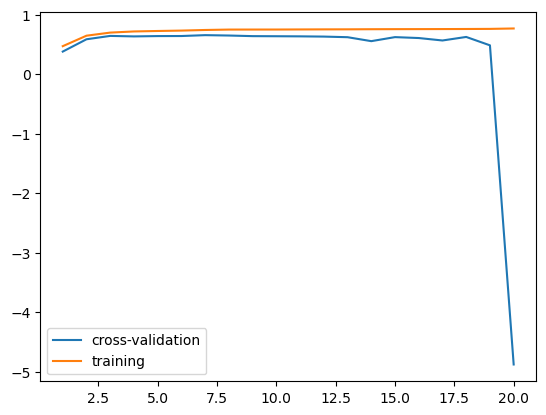

In [81]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), LinearRegression())
# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, x[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)
# Plot the mean train score and validation score across folds
plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), label='training')
plt.legend(loc='best')

Esta figura muestra por qué la validación es importante. En el lado izquierdo del gráfico, tenemos un polinomio de grado muy bajo, que subajusta los datos. Esto lleva a una baja varianza explicada tanto para el conjunto de entrenamiento como para el conjunto de validación. En el extremo derecho del gráfico, tenemos un polinomio de grado muy alto, que sobreajusta los datos. Esto se puede ver en el hecho de que la varianza explicada en el entrenamiento es muy alta, mientras que en el conjunto de validación es baja. Elegir un d alrededor de 4 o 5 nos da la mejor compensación.


> <span style="color:black; background-color:lightgreen; padding:2px;">El lector avivado se dará cuenta de que algo está mal aquí: en el gráfico anterior, `d = 4` da los mejores resultados. Pero en el gráfico anterior, encontramos que `d = 6` sobreajusta en gran medida los datos. ¿Qué está pasando aquí? La diferencia es el **número de puntos de entrenamiento** utilizados. En el ejemplo anterior, solo había ocho puntos de entrenamiento. En este ejemplo, tenemos 100. Como regla general, cuantos más puntos de entrenamiento se utilicen, más complicado puede ser el modelo. Pero, ¿cómo puedes determinar para un modelo dado si más puntos de entrenamiento serán útiles? Un diagnóstico útil para esto son las curvas de aprendizaje.
> </span>


### Curvas de Aprendizaje

Una curva de aprendizaje muestra la puntuación de entrenamiento y validación como una función del número de puntos de entrenamiento. Ten en cuenta que cuando entrenamos en un subconjunto de los datos de entrenamiento, la puntuación de entrenamiento se calcula usando este subconjunto, no el conjunto de entrenamiento completo. Esta curva ofrece una vista cuantitativa de cuán beneficioso será agregar muestras de entrenamiento.

> <span style="color:black; background-color:lightgrey; padding:2px;">**Preguntas:** 
> - A medida que aumenta el número de muestras de entrenamiento, ¿qué esperas ver en la puntuación de entrenamiento? ¿Y en la puntuación de validación?
> - ¿Esperarías que la puntuación de entrenamiento sea mayor o menor que la puntuación de validación? ¿Esperarías que esto cambie alguna vez?
> </span>

**scikit-learn** proporciona [sklearn.model_selection.learning_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve):


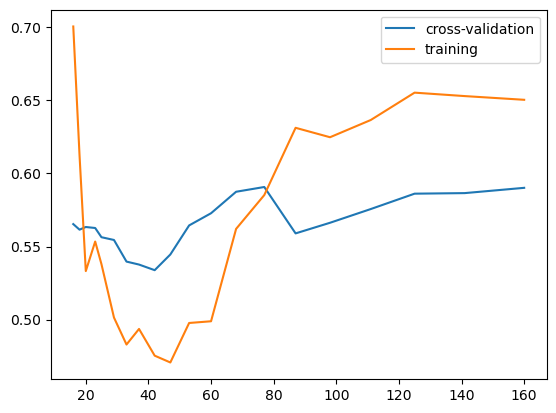

In [83]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
    model, x[:, np.newaxis], y, train_sizes=np.logspace(-1, 0, 20))
# Plot the mean train score and validation score across folds
plt.plot(train_sizes, validation_scores.mean(axis=1), label='cross-validation')
plt.plot(train_sizes, train_scores.mean(axis=1), label='training')
plt.legend()

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_bias_variance_004.png)
para un modelo de grado = 1

Nota que la puntuación de validación generalmente aumenta con un conjunto de entrenamiento en crecimiento, mientras que la puntuación de entrenamiento generalmente disminuye con un conjunto de entrenamiento en crecimiento. A medida que aumenta el tamaño del entrenamiento, convergerán a un solo valor.

A partir de la discusión anterior, sabemos que d = 1 es un estimador de alto sesgo que subajusta los datos. Esto se indica por el hecho de que tanto las puntuaciones de entrenamiento como las de validación son bajas. Cuando nos enfrentamos a este tipo de curva de aprendizaje, podemos esperar que agregar más datos de entrenamiento no ayudará: ambas líneas convergen a una puntuación relativamente baja.

**Cuando las curvas de aprendizaje han convergido a una puntuación baja, tenemos un modelo de alto sesgo.**

Un modelo de alto sesgo se puede mejorar:

- Usando un modelo más sofisticado (es decir, en este caso, aumentar d)
- Recopilando más características para cada muestra.
- Disminuyendo la regularización en un modelo regularizado.

Sin embargo, aumentar el número de muestras no mejora un modelo de alto sesgo.

Ahora veamos un modelo de alta varianza (es decir, sobreajustado):

![High-Variance Model](https://lectures.scientific-python.org/_images/sphx_glr_plot_bias_variance_006.png)
Para un modelo de grado=15

Aquí mostramos la curva de aprendizaje para d = 15. A partir de la discusión anterior, sabemos que d = 15 es un estimador de alta varianza que sobreajusta los datos. Esto se indica por el hecho de que la puntuación de entrenamiento es mucho más alta que la puntuación de validación. A medida que añadimos más muestras a este conjunto de entrenamiento, la puntuación de entrenamiento continuará disminuyendo, mientras que el error de validación cruzada seguirá aumentando, hasta que se encuentren en el medio.



**Las curvas de aprendizaje que aún no han convergido con el conjunto de entrenamiento completo indican un modelo de alta varianza y sobreajustado.**

Un modelo de alta varianza se puede mejorar:

- Recolectando más muestras de entrenamiento.
- Usando un modelo menos sofisticado (es decir, en este caso, hacer d más pequeño)
- Aumentando la regularización.

En particular, recolectar más características para cada muestra no ayudará a mejorar los resultados.


### 3.4.7.3. Resumen sobre la selección de modelos

Hemos visto anteriormente que un algoritmo con bajo rendimiento puede deberse a dos posibles situaciones: alto sesgo (subajuste) y alta varianza (sobreajuste). Para evaluar nuestro algoritmo, reservamos una parte de nuestros datos de entrenamiento para la validación cruzada. Usando la técnica de curvas de aprendizaje, podemos entrenar en subconjuntos progresivamente más grandes de los datos, evaluando el error de entrenamiento y el error de validación cruzada para determinar si nuestro algoritmo tiene alta varianza o alto sesgo. ¿Pero qué hacemos con esta información?

**Alto sesgo**

Si un modelo muestra alto **sesgo**, las siguientes acciones pueden ayudar:

- **Agregar más características**. En nuestro ejemplo de predicción de precios de viviendas, puede ser útil usar información como el vecindario en el que se encuentra la casa, el año en que se construyó la casa, el tamaño del terreno, etc. Agregar estas características a los conjuntos de entrenamiento y prueba puede mejorar un estimador con alto sesgo.

- **Usar un modelo más sofisticado**. Agregar complejidad al modelo puede ayudar a mejorar el sesgo. Para un ajuste polinómico, esto se puede lograr aumentando el grado d. Cada técnica de aprendizaje tiene sus propios métodos para agregar complejidad.

- **Usar menos muestras**. Aunque esto no mejorará la clasificación, un algoritmo con alto sesgo puede alcanzar casi el mismo error con una muestra de entrenamiento más pequeña. Para los algoritmos que son computacionalmente costosos, reducir el tamaño de la muestra de entrenamiento puede llevar a grandes mejoras en la velocidad.

- **Disminuir la regularización**. La regularización es una técnica utilizada para imponer simplicidad en algunos modelos de aprendizaje automático, agregando un término de penalización que depende de las características de los parámetros. Si un modelo tiene alto sesgo, disminuir el efecto de la regularización puede llevar a mejores resultados.

**Alta varianza**

Si un modelo muestra alta varianza, las siguientes acciones pueden ayudar:

- **Usar menos características**. Usar una técnica de selección de características puede ser útil y disminuir el sobreajuste del estimador.

- **Usar un modelo más simple**. La complejidad del modelo y el sobreajuste van de la mano.

- **Usar más muestras de entrenamiento**. Agregar muestras de entrenamiento puede reducir el efecto del sobreajuste y llevar a mejoras en un estimador de alta varianza.

- **Aumentar la regularización**. La regularización está diseñada para prevenir el sobreajuste. En un modelo de alta varianza, aumentar la regularización puede llevar a mejores resultados.

Estas opciones se vuelven muy importantes en situaciones del mundo real. Por ejemplo, debido al tiempo limitado del telescopio, los astrónomos deben buscar un equilibrio entre observar un gran número de objetos y observar un gran número de características para cada objeto. Determinar cuál es más importante para una tarea de aprendizaje en particular puede informar la estrategia de observación que emplea el astrónomo.

### 3.4.7.4. Una última palabra de precaución: separar el conjunto de validación y el conjunto de prueba

Usar esquemas de validación para determinar los hiperparámetros significa que estamos ajustando los hiperparámetros al conjunto de validación en particular. De la misma manera que los parámetros pueden sobreajustarse al conjunto de entrenamiento, los hiperparámetros pueden sobreajustarse al conjunto de validación. Debido a esto, el error de validación tiende a subestimar el error de clasificación de los nuevos datos.

Por esta razón, se recomienda dividir los datos en tres conjuntos:

- El **conjunto de entrenamiento**, usado para entrenar el modelo (usualmente ~60% de los datos)
- El **conjunto de validación**, usado para validar el modelo (usualmente ~20% de los datos)
- El **conjunto de prueba**, usado para evaluar el error esperado del modelo validado (usualmente ~20% de los datos)

Muchos practicantes de aprendizaje automático no separan el conjunto de prueba y el conjunto de validación. Pero si tu objetivo es medir el error de un modelo en datos desconocidos, usar un conjunto de prueba independiente es vital.


REFERENCIA: https://lectures.scientific-python.org/packages/scikit-learn/index.html#unsupervised-learning-dimensionality-reduction-and-visualization


[### 3.4.8. Ejemplos del capítulo de scikit-learn
](https://lectures.scientific-python.org/packages/scikit-learn/index.html#id14)